# Call Graphs

This notebook demonstrates the use of the [GraphViz software](http://www.graphviz.org) and the [Python graphviz package](http://graphviz.readthedocs.org/en/latest/) to create call graphs.

It has three parts:
  * **Warm Up** adds `print` commands to `nchoosek`, to show what calls what
  * **Creating Graphviz Files** modifies this to create a file that GraphViz can create a PNG or SVG from.
  * **The Python GraphViz Package** demonstrates a Python library that you can use instead of `print` statements.

plus a couple of appendices.

Setup:

    sudo apt-get install graphviz

## 1. Warm Up

We'll start with the basic, non-caching, recursive implementation of *n*-choose-*k*:

In [1]:
# Basic nchoosek, without caching

def nchoosek(n, k):
    if k == 0:
        return 1
    if n == k:
        return 1
    return nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)

print '5 choose 2 =', nchoosek(5, 2)
print '4 choose 3 =', nchoosek(4, 3)

5 choose 2 = 10
4 choose 3 = 4


In [2]:
# Add caching

cache = {}

def nchoosek(n, k):
    r = cache.get((n, k), None)
    if r is not None:
        return r

    if k == 0:
        return 1
    if n == k:
        return 1

    r = nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)
    cache[(n, k)] = r
    return r

print '5 choose 2 =', nchoosek(5, 2)
print '4 choose 3 =', nchoosek(4, 3)

5 choose 2 = 10
4 choose 3 = 4


In [3]:
# Print recursive calls

cache = {}

def nchoosek(n, k):
    r = cache.get((n, k), None)
    if r is not None:
        return r

    if n == 0:
        return 1
    if n == k:
        return 1

    print 'nchoosek{} -> nchoosek{}'.format((n, k), (n - 1, k - 1))
    print 'nchoosek{} -> nchoosek{}'.format((n, k), (n - 1, k))
    r = nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)
    cache[(n, k)] = r
    return r

nchoosek(5, 2)
# nchoosek(4, 3) -- removed to reduce the size of the output shorter

nchoosek(5, 2) -> nchoosek(4, 1)
nchoosek(5, 2) -> nchoosek(4, 2)
nchoosek(4, 1) -> nchoosek(3, 0)
nchoosek(4, 1) -> nchoosek(3, 1)
nchoosek(3, 0) -> nchoosek(2, -1)
nchoosek(3, 0) -> nchoosek(2, 0)
nchoosek(2, -1) -> nchoosek(1, -2)
nchoosek(2, -1) -> nchoosek(1, -1)
nchoosek(1, -2) -> nchoosek(0, -3)
nchoosek(1, -2) -> nchoosek(0, -2)
nchoosek(1, -1) -> nchoosek(0, -2)
nchoosek(1, -1) -> nchoosek(0, -1)
nchoosek(2, 0) -> nchoosek(1, -1)
nchoosek(2, 0) -> nchoosek(1, 0)
nchoosek(1, 0) -> nchoosek(0, -1)
nchoosek(1, 0) -> nchoosek(0, 0)
nchoosek(3, 1) -> nchoosek(2, 0)
nchoosek(3, 1) -> nchoosek(2, 1)
nchoosek(2, 1) -> nchoosek(1, 0)
nchoosek(2, 1) -> nchoosek(1, 1)
nchoosek(4, 2) -> nchoosek(3, 1)
nchoosek(4, 2) -> nchoosek(3, 2)
nchoosek(3, 2) -> nchoosek(2, 1)
nchoosek(3, 2) -> nchoosek(2, 2)


26

# Creating GraphViz Files

In [4]:
# Print recursive calls as edges in Graphviz's DOT language.
# Also print the preamble and postamble that make the output a DOT graph description.

cache = {}

def nchoosek(n, k):
    r = cache.get((n, k), None)
    if r is not None:
        return r

    if n == 0:
        return 1
    if n == k:
        return 1

    print '  "{}" -> "{}";'.format((n, k), (n - 1, k - 1))
    print '  "{}" -> "{}";'.format((n, k), (n - 1, k))
    r = nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)
    cache[(n, k)] = r
    return r

print "digraph G {"
print '  rankdir="TD";'
nchoosek(5, 2)
# nchoosek(4, 3) -- removed to reduce the size of the output shorter
print "}"

digraph G {
  rankdir="TD";
  "(5, 2)" -> "(4, 1)";
  "(5, 2)" -> "(4, 2)";
  "(4, 1)" -> "(3, 0)";
  "(4, 1)" -> "(3, 1)";
  "(3, 0)" -> "(2, -1)";
  "(3, 0)" -> "(2, 0)";
  "(2, -1)" -> "(1, -2)";
  "(2, -1)" -> "(1, -1)";
  "(1, -2)" -> "(0, -3)";
  "(1, -2)" -> "(0, -2)";
  "(1, -1)" -> "(0, -2)";
  "(1, -1)" -> "(0, -1)";
  "(2, 0)" -> "(1, -1)";
  "(2, 0)" -> "(1, 0)";
  "(1, 0)" -> "(0, -1)";
  "(1, 0)" -> "(0, 0)";
  "(3, 1)" -> "(2, 0)";
  "(3, 1)" -> "(2, 1)";
  "(2, 1)" -> "(1, 0)";
  "(2, 1)" -> "(1, 1)";
  "(4, 2)" -> "(3, 1)";
  "(4, 2)" -> "(3, 2)";
  "(3, 2)" -> "(2, 1)";
  "(3, 2)" -> "(2, 2)";
}


Now we want to save the DOT instructions to disk, instead of printing them to standard output,
so that the Graphviz `dot` program can be run on it.

We save many of the programmatically-generated files into a `build` directory, in order to keep programmatically
generated files distinct from source files such as this notebook. The following UNIX command ensures
the existence of this `build` directory.

In [5]:
!mkdir -p build

Starting a notebook line with `!` is the same as typing that command into the terminal.

In [6]:
# Replace `print` by `file.write`. This change directs the output to a file instead of standard output.

cache = {}
dotfile = open('build/nchoosek-1.gv', 'w')

def nchoosek(n, k):
    r = cache.get((n, k), None)
    if r is not None:
        return r

    if n == 0:
        return 1
    if n == k:
        return 1

    dotfile.write('  "{}" -> "{}";'.format((n, k), (n - 1, k - 1)))
    dotfile.write('  "{}" -> "{}";'.format((n, k), (n - 1, k)))
    r = nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)
    cache[(n, k)] = r
    return r

dotfile.write("digraph G {")
dotfile.write('  rankdir="TD";')
nchoosek(5, 2)
nchoosek(4, 3)
dotfile.write("}")

dotfile.close()

In [7]:
# The unix `ls` command shows that there's a file named "nchoosek.gv".
!ls build

nchoosek-1.gv


In [8]:
# Run the `dot` program from the GraphViz software distribution.
# This reads the DOT graph description from `build/nchoosek-1.gv`,
# and creates an image file at `images/nchoosek-1.gv.png`.
!dot build/nchoosek-1.gv -Tpng -o images/nchoosek-1.gv.png

# Verify that `dot` created an image file.
!ls images

nchoosek-1.gv.png nchoosek-2.gv     nchoosek-2.gv.png nchoosek-3.gv.png


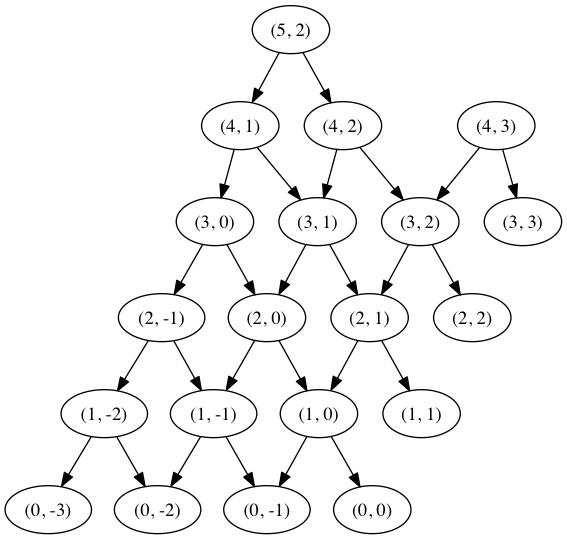

In [9]:
# Here's how to display an image file inside a notebook.
# You could also open the file in an image viewer or browser.
from IPython.display import Image
Image(filename="images/nchoosek-1.gv.png")

## 3. Python GraphViz Package

We can use the [Python graphviz package](http://graphviz.readthedocs.org/en/latest/) to construct the file, instead of using `print` statements.

This makes for clearer code, at the expense of a package requirement.

It's probably what I would have done had I discovered the Python package earlier.

Setup:

    sudo pip install graphviz

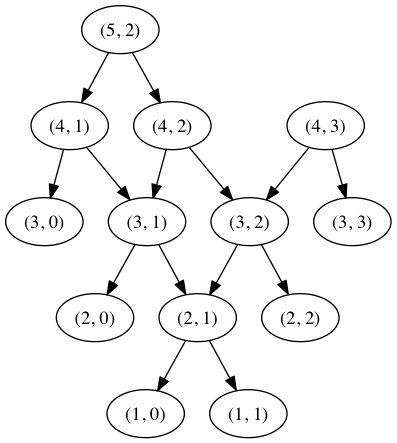

In [10]:
from graphviz import Digraph

graph = Digraph(format='png')
cache = {}

def nchoosek(n, k):
    if (n, k) in cache:
        return cache[n, k]
    if k == 0:
        return 1
    if n == k:
        return 1
    graph.edge(str((n, k)), str((n - 1, k - 1)))
    graph.edge(str((n, k)), str((n - 1, k)))
    r = nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)
    cache[n, k] = r
    return r

nchoosek(5, 2)
nchoosek(4, 3)
image_file = graph.render(filename="images/nchoosek-2.gv")
Image(filename="images/nchoosek-2.gv.png")

## Appendix I: An alternative to `open(filename)`

Remember the version of `nchoosek` that printed to standard output?

Earlier we modified it to write to a file instead, by changing all the `print` statments to `dotfile.write`?

Here's another approach. Instead of changing each `print` statement *inside* the program, use a UNIX feature to redirect all the program's output into a file.

This introduces a UNIX feature that has nothing to do with Python programming. I include it as a record of how I *actually* wrote the call graph program, before I cleaned it up into what I felt I *should* have written.

The next cell contains the same code as the first cell under **Creating GraphViz Files**, above.
The difference is that the cell below begins with a line `%%writefile "nchoosek.py"`.
This tells Jupyter to save the cell as a file named `nchoosek.py`, instead of running it.
You could just create this file with a text editor and copy and paste the text below into it, instead.

In [11]:
%%writefile build/nchoosek.py

cache = {}

def nchoosek(n, k):
    r = cache.get((n, k), None)
    if r is not None:
        return r

    if n == 0:
        return 1
    if n == k:
        return 1

    print '  "{}" -> "{}";'.format((n, k), (n - 1, k - 1))
    print '  "{}" -> "{}";'.format((n, k), (n - 1, k))
    r = nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)
    cache[(n, k)] = r
    return r

print "digraph G {"
print '  rankdir="TD";'
nchoosek(5, 2)
print "}"

Writing build/nchoosek.py


Run the program.
`> build/nchoosek.gv` says to redirect the output of `python nchoosek.py` into a new file `build/nchoosek.gv`.

In [12]:
!python build/nchoosek.py > build/nchoosek-3.gv
!ls build

nchoosek-1.gv nchoosek-3.gv nchoosek.py


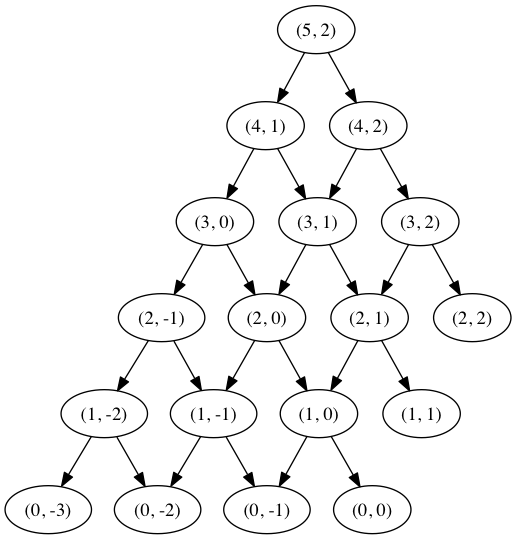

In [13]:
# Run `dot` on the DOT file to create a PNG file;
# and display the file below.
!dot build/nchoosek-3.gv -Tpng -o images/nchoosek-3.gv.png
Image(filename="images/nchoosek-3.gv.png")

## Appendix II: An IPython Shortcut

If we're writing code just for notebooks, we can skip writing to the file entirely, and just return the `Digraph` object from the GraphViz library: 

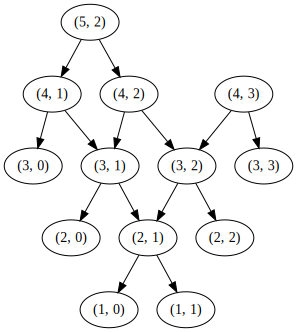

In [14]:
from graphviz import Digraph

cache = {}
graph = Digraph(format='svg')

def nchoosek(n, k):
    if (n, k) in cache:
        return cache[n, k]
    if k == 0:
        return 1
    if n == k:
        return 1
    graph.edge(str((n, k)), str((n - 1, k - 1)))
    graph.edge(str((n, k)), str((n - 1, k)))
    r = nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)
    cache[n, k] = r
    return r

nchoosek(5, 2)
nchoosek(4, 3)
graph

Now lets try the same thing on Levenshtein.

First, we're going to transform the implementation into one that's easier to instrument.

In [15]:
# The original memoized version.

cache = {}

def lev(a, b):
    if (a, b) in cache:
        return cache[a, b]

    if a == "":
        return len(b)
    if b == "":
        return len(a)

    if a[0] == b[0]:
        r1 = lev(a[1:], b[1:])
    else:
        r1 = lev(a[1:], b[1:]) + 1
    r2 = lev(a, b[1:]) + 1
    r3 = lev(a[1:], b) + 1
    distance = min(r1, r2, r3)
    cache[a, b] = distance
    return distance

print 'lev("battle", "bet") =', lev("battle", "bet")
print 'lev("battle", "pedal") =', lev("battle", "pedal")

lev("battle", "bet") = 4
lev("battle", "pedal") = 5


In [16]:
# Build a list `distances` of the recursive calls' return values,
# instead of using a new variable for each recursive result.

cache = {}

def lev(a, b):
    if (a, b) in cache:
        return cache[a, b]

    if a == "":
        return len(b)
    if b == "":
        return len(a)

    distances = []
    if a[0] == b[0]:
        distances.append(lev(a[1:], b[1:]))
    else:
        distances.append(lev(a[1:], b[1:]) + 1)
    distances.append(lev(a, b[1:]) + 1)
    distances.append(lev(a[1:], b) + 1)
    distance = min(distances)
    cache[a, b] = distance
    return distance

print 'lev("battle", "bet") =', lev("battle", "bet")
print 'lev("battle", "pedal") =', lev("battle", "pedal")

lev("battle", "bet") = 4
lev("battle", "pedal") = 5


Instead of collecting the *result of* each recursive call, collect the *arguments to* each call.

Build a list of the recursive call's argument values, and how much to add to each one.

Each item in the list is a tuple $(a_1, b_1, \Delta)$, where $a_1$ and $b_1$ are the arguments to the recursive call to `lev`, and $\Delta$ is the value to add to its return value.

In [17]:
cache = {}

def lev(a, b):
    if (a, b) in cache:
        return cache[a, b]

    if a == "":
        return len(b)
    if b == "":
        return len(a)

    recursive_call_args = []
    if a[0] == b[0]:
        recursive_call_args.append((a[1:], b[1:], 0))
    else:
        recursive_call_args.append((a[1:], b[1:], 1))
    recursive_call_args.append((a, b[1:], 1))
    recursive_call_args.append((a[1:], b, 1))
    distance = min(lev(a1, b1) + delta for a1, b1, delta in recursive_call_args)
    cache[a, b] = distance
    return distance

print 'lev("battle", "bet") =', lev("battle", "bet")
print 'lev("battle", "pedal") =', lev("battle", "pedal")

lev("battle", "bet") = 4
lev("battle", "pedal") = 5


Finally, add the calls to collect the graph edges:

lev("battle", "bet") = 4
lev("battle", "pedal") = 5


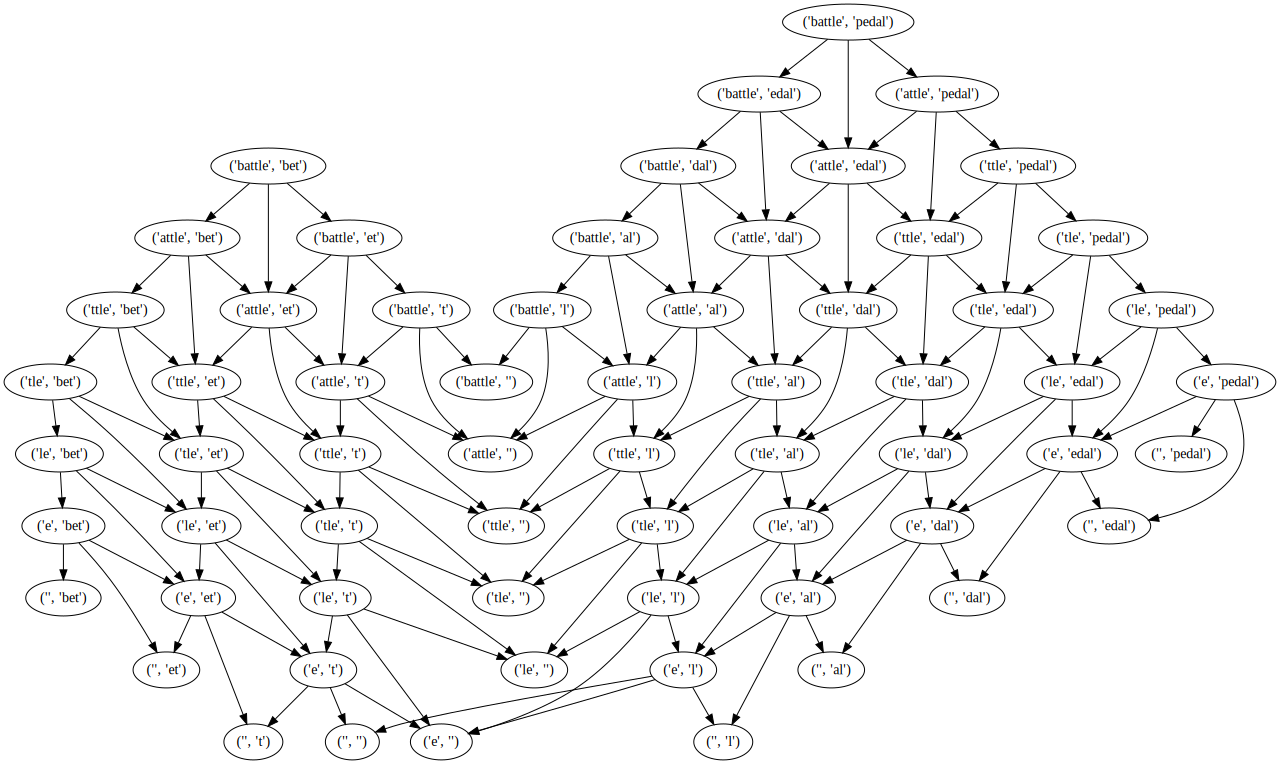

In [18]:
cache = {}
graph = Digraph(format='svg')

def lev(a, b):
    if (a, b) in cache:
        return cache[a, b]

    if a == "":
        return len(b)
    if b == "":
        return len(a)

    recursive_call_args = []
    if a[0] == b[0]:
        recursive_call_args.append((a[1:], b[1:], 0))
    else:
        recursive_call_args.append((a[1:], b[1:], 1))
    recursive_call_args.append((a, b[1:], 1))
    recursive_call_args.append((a[1:], b, 1))
    for a1, b1, _ in recursive_call_args:
        graph.edge(str((a, b)), str((a1, b1)))
    r = min(lev(a1, b1) + delta for a1, b1, delta in recursive_call_args)
    cache[a, b] = r
    return r

print 'lev("battle", "bet") =', lev("battle", "bet")
print 'lev("battle", "pedal") =', lev("battle", "pedal")
graph

This is the payoff for the transformations above, to collect the arguments to the recursive calls into a list instead of applying `lev` to them immediately.

Now that there's a list, we can use it both to create the edges in the graph, and to perform the actual computation.

\[Another (much more advanced) strategy, that doesn't involve changing the implementation of `lev`, is in [Call Graphs 2](./Call Graphs 2.ipynb).]